# Analyzing global terrorism throughout the last 50 years

## Importing Libraries and Packages

In [29]:
! pip install geopandas

In [30]:
! pip install folium

In [31]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import dash
from dash import Dash, dcc, html, Input, Output, dash_table, State

pd.set_option('display.max_columns', None)

In [32]:
# Reading in the data with the proper encoding
data = pd.read_csv('gt_data.csv', encoding='ISO-8859-1')

## Exploring the Data

In [33]:
data.shape

(181691, 135)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [35]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [36]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [37]:
print("Country with the most attacks:", data['country'].value_counts().idxmax())
print("City with the most attacks:", data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['region'].value_counts().idxmax())
print("Year with the most attacks:", data['iyear'].value_counts().idxmax())
print("Month with the most attacks:", data['imonth'].value_counts().idxmax())
print("Group with the most attacks:", data['gname'].value_counts().index[1])
print("Most Attack Types:", data['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [38]:
columns = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate','city', 'latitude', 'longitude', 
           'suicide', 'attacktype1_txt', 'targtype1_txt', 'target1', 'gname', 'motive', 'weaptype1_txt', 'propvalue', 'nkill', 'nwound']

df = data[columns].rename(columns = {'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'provstate':'state',
                'attacktype1_txt':'attack_type', 'target1':'target', 'nkill':'killed', 'nwound':'wounded', 'gname':'group',
                'targtype1_txt':'target_type', 'weaptype1_txt':'weapon_type', 'propvalue' : 'property_value'})


df.head()

,year,month,day,country,region,state,city,latitude,longitude,suicide,attack_type,target_type,target,group,motive,weapon_type,property_value,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [39]:
df.isnull().sum()

year                   0
month                  0
day                    0
country                0
region                 0
state                421
city                 434
latitude            4556
longitude           4557
suicide                0
attack_type            0
target_type            0
target               636
group                  0
motive            131130
weapon_type            0
property_value    142702
killed             10313
wounded            16311
dtype: int64

## All Attacks

In [40]:
# YEARLY ATTACKS BY REGION

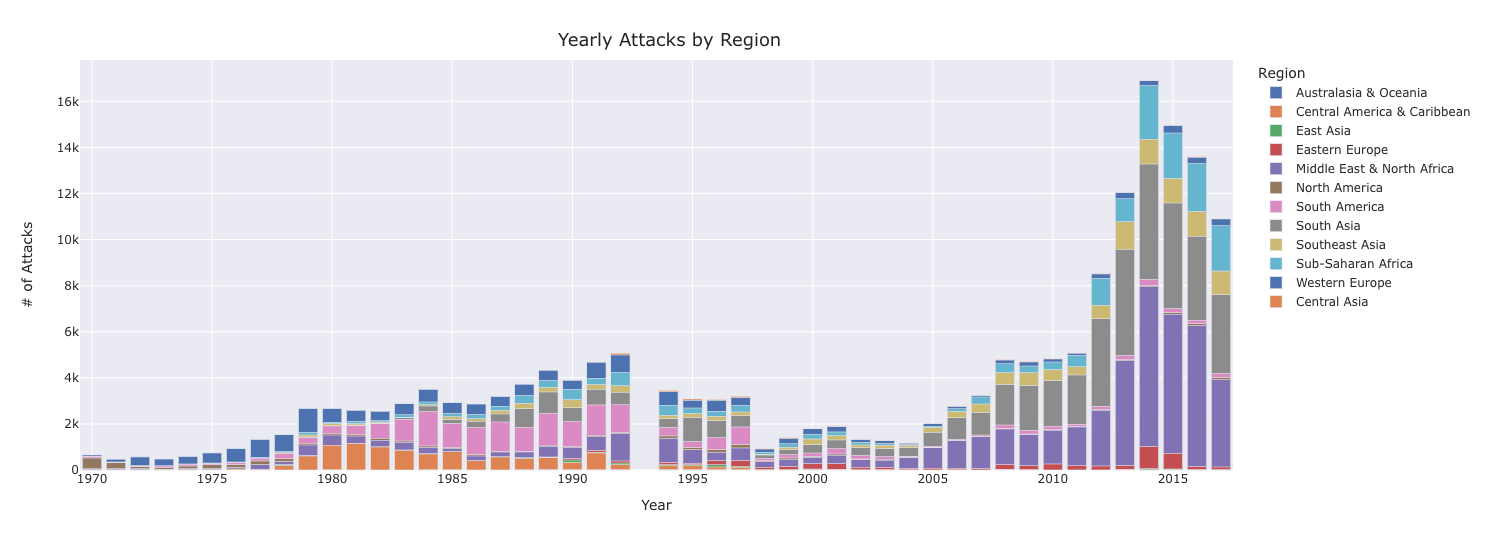

In [41]:
region_per_yr = df.groupby(['year', 'region']).size().reset_index(name = 'across_region').rename(columns = {'region' : 'Region'})
regions = list(region_per_yr['Region'])

total_per_yr = region_per_yr.groupby('year').sum('across_region').reset_index().rename(columns = {'across_region' : 'across_year'})
joined_df = region_per_yr.merge(total_per_yr, left_on = 'year', right_on = 'year', how = 'left')

fig = px.bar(joined_df, x = 'year', y = 'across_region', color = 'Region', template = 'seaborn',
            height = 550, labels={'year' : 'Year', 'across_region' : '# of Attacks'})

fig.update_layout(title = {'text' : 'Yearly Attacks by Region', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, hovermode = 'x')

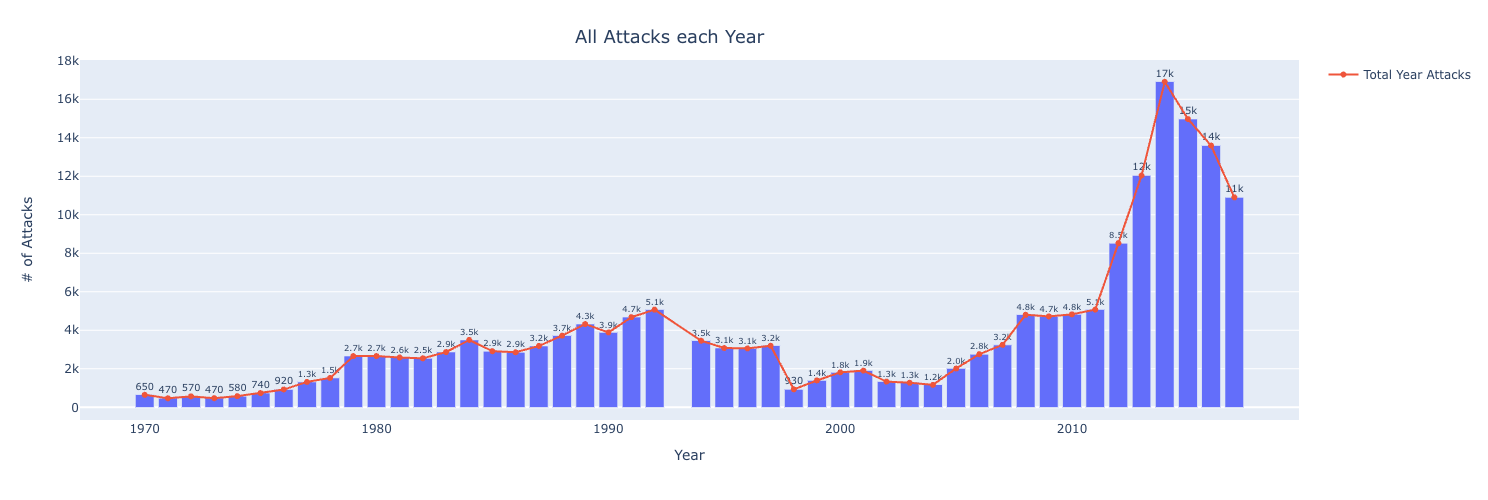

In [42]:
total_per_yr = region_per_yr.groupby('year').sum('across_region').reset_index().rename(columns = {'across_region' : 'across_year'})

fig = px.bar(total_per_yr, x = 'year', y = 'across_year', text_auto='.2s', template = 'plotly',
            height = 500, labels={'year' : 'Year', 'across_year' : '# of Attacks'})

fig.update_layout(title = {'text' : 'All Attacks each Year', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18})

fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)

fig.add_trace(go.Scatter(
        x = total_per_yr['year'].values,
        y = total_per_yr['across_year'].values,
        mode = 'lines+markers',
        name = 'Total Year Attacks'
    ))

In [43]:
# YEARLY ATTACKS BY COUNTRY

In [44]:
country_per_yr = df.groupby(['year', 'country']).size().reset_index(name = 'across_country').rename(columns = 
                                                                                       {'country' : 'Country'}).sort_values(['year', 'across_country'], ascending = [True, False])
country_per_yr = country_per_yr.groupby('year').head(10).reset_index(drop = True)
regions = list(country_per_yr['Country'])

total_per_yr = country_per_yr.groupby('year').sum('across_country').reset_index().rename(columns = {'across_country' : 'across_year'})
joined_df = country_per_yr.merge(total_per_yr, left_on = 'year', right_on = 'year', how = 'left')

fig = px.bar(joined_df, x = 'year', y = 'across_country', color = 'Country', template = 'seaborn',
            height = 550, labels={'year' : 'Year', 'across_country' : '# of Attacks'})

fig.update_layout(title = {'text' : 'Yearly Attacks by Country', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, hovermode = 'x')

fig.add_trace(go.Scatter(
        x = total_per_yr['year'].values,
        y = total_per_yr['across_year'].values,
        mode = 'lines+markers',
        name = 'Total Deaths'
    ))

## All Deaths and Injuries

In [45]:
# YEARLY DEATHS BY REGION

region_per_yr = df[['year', 'region', 'country', 'killed']].groupby(
    ['year', 'region']).sum('killed').reset_index().rename(columns = {'region' : 'Region'})
regions = list(region_per_yr['Region'])

total_per_yr = region_per_yr.groupby('year').sum('killed').reset_index().rename(columns = {'killed' : 'across_year'}).astype({'across_year' : int})
joined_df = region_per_yr.merge(total_per_yr, left_on = 'year', right_on = 'year', how = 'left')

fig = px.bar(joined_df, x = 'year', y = 'killed', color = 'Region', template = 'seaborn',
            height = 550, labels={'year' : 'Year', 'across_region' : '# of Attacks'})

fig.update_layout(title = {'text' : 'Yearly Deaths by Region', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, hovermode = 'x')

fig.add_trace(go.Scatter(
        x = total_per_yr['year'].values,
        y = total_per_yr['across_year'].values,
        mode = 'lines+markers',
        name = 'Total Deaths'
    ))

In [46]:
# YEARLY INJURIES BY REGION

region_per_yr = df[['year', 'region', 'country', 'wounded']].groupby(['year', 'region']).sum('wounded').reset_index().rename(columns = {'region' : 'Region'})
regions = list(region_per_yr['Region'])

total_per_yr = region_per_yr.groupby('year').sum('wounded').reset_index().rename(columns = {'wounded' : 'across_year'}).astype({'across_year' : int})
joined_df = region_per_yr.merge(total_per_yr, left_on = 'year', right_on = 'year', how = 'left')

fig = px.bar(joined_df, x = 'year', y = 'wounded', color = 'Region', template = 'ggplot2',
            height = 550, labels={'year' : 'Year', 'across_region' : '# of Attacks'})

fig.update_layout(title = {'text' : 'Yearly Injuries by Region', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, hovermode = 'x')

fig.add_trace(go.Scatter(
        x = total_per_yr['year'].values,
        y = total_per_yr['across_year'].values,
        mode = 'lines+markers',
        name = 'Total Injuries'
    ))

In [47]:
# - INSERT -

# YEARLY INJURIES BY COUNTRY
# YEARLY INJURIES BY COUNTRY

In [48]:
# - INSERT -

# YEARLY PROPERTY VALUE LOST BY REGION
# YEARLY PROPERTY VALUE LOST BY COUNTRY

## All Attacks/Injuries/Deaths in One

In [49]:
df.head()

,year,month,day,country,region,state,city,latitude,longitude,suicide,attack_type,target_type,target,group,motive,weapon_type,property_value,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [50]:
# ALL TOTAL CASUALTIES

filtered = df[['year', 'month', 'wounded', 'killed']]
grouped = df.groupby('year').agg({'month' : 'size', 'killed' : 'sum', 'wounded' : 'sum'}).astype({'killed' : int, 'wounded' : int}).rename(columns = {'month' : 'attacks'}).reset_index()

fig = px.line(template = 'seaborn')


fig.add_trace(go.Scatter(
        x = grouped['year'].values,
        y = grouped['attacks'].values,
        mode = 'markers+lines',
        name = 'Total Attacks'
    ))


fig.add_trace(go.Scatter(
        x = grouped['year'].values,
        y = grouped['killed'].values,
        mode = 'markers+lines',
        name = 'Total Deaths'
    ))


fig.add_trace(go.Scatter(
        x = grouped['year'].values,
        y = grouped['wounded'].values,
        mode = 'markers+lines',
        name = 'Total Injuries'
    ))

fig.update_traces(mode="markers+lines", hovertemplate = None)

fig.update_xaxes(showspikes=True, spikecolor="red", spikemode = 'across', spikethickness=2.5)
fig.update_yaxes(showspikes=True, spikecolor="black", spikemode = 'across', spikethickness=2.5)

fig.update_layout(hovermode="x unified", hoverlabel=dict(bgcolor="white", font_size=12), height = 500,
                 title = {'text' : 'Total Casualties per Year from 1970 - 2017', 'x' : 0.48, 'y' : 0.94, 'font_size' : 18},
                 xaxis_title="Year",
                 yaxis_title="Count")


fig.show()

In [51]:
# ALL AVERAGE CASUALTIES

filtered = df[['year', 'month', 'wounded', 'killed']]  # .astype({'killed' : int, 'wounded' : int})
grouped = df.groupby('year').agg({'killed' : 'mean', 'wounded' : 'mean'}).astype({'killed' : float, 'wounded' : float}).rename(columns = {'month' : 'attacks'}).reset_index()

fig = px.line(template = 'seaborn')

fig.add_trace(go.Scatter(
        x = grouped['year'].values,
        y = grouped['killed'].values,
        mode = 'markers+lines',
        name = 'Average # of Deaths'
    ))


fig.add_trace(go.Scatter(
        x = grouped['year'].values,
        y = grouped['wounded'].values,
        mode = 'markers+lines',
        name = 'Average # of Injuries'
    ))

fig.update_traces(mode="markers+lines", hovertemplate = None)

fig.update_xaxes(showspikes=True, spikecolor="red", spikemode = 'across', spikethickness=3.5)
fig.update_yaxes(showspikes=True, spikecolor="black", spikemode = 'across', spikethickness=3.5)

fig.update_layout(hovermode="x unified", hoverlabel=dict(bgcolor="white", font_size=12), height = 500,
                 title = {'text' : 'Average Casualties per Year from 1970 - 2017', 'x' : 0.48, 'y' : 0.94, 'font_size' : 18},
                 xaxis_title="Year",
                 yaxis_title="Count")

fig.show()

In [52]:
# reference to get similar format from the chart at the bottom: https://plotly.com/python/line-charts/#line-plot-with-goscatter

In [53]:
# LOOK AT AVERAGE # OF DEATHS BY REGION

In [ ]:
df_filtered = df[['year', 'region', 'wounded', 'killed']]
avg_death_by_region = df_filtered.groupby(['year', 'region']).agg({'killed' : 'mean'}).reset_index().rename(columns = {'killed' : 'avg_killed', 'region' : 'Region'})

fig = px.line(avg_death_by_region, x = 'year', y = 'avg_killed', color = 'Region', markers = True, height = 500,
             labels = {'avg_killed' : 'Average # of Deaths', 'year' : 'Year'}, template = 'seaborn')
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title = {'text' : 'Average # of Deaths by Region per Year', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18})
fig.update_xaxes(showspikes=True, spikecolor="red", spikemode = 'across', spikethickness=3.5)
fig.show()

In [ ]:
# LOOK AT AVERAGE AND TOTAL # OF ATTACKS DUE TO SPECIFIC ATTACK TYPES BY YEAR TO SEE IF THERE ARE CERTAIN TRENDS IN ATTACK TYPES
# ADD DROPDOWN TO FILTER FOR COUNTRY, REGION, ETC.

#df_filtered = df[df['region'] == 'South Asia']

In [ ]:
df_filtered = df[['year', 'attack_type', 'wounded', 'killed']][(df['attack_type'] != 'Unknown')]
by_region = df_filtered.groupby(['year', 'attack_type']).agg({'attack_type' : 'size', 'killed' : 'sum', 'wounded' : 'sum'})
by_region = by_region.rename(columns = {
    'attack_type' : 'attacks'}).reset_index().astype({'killed' : int, 'wounded' : int}).rename(columns = {'attack_type' : 'Attack Type'})

# getting attack type percentages by year
attack_props = []
death_props = []
wounded_props = []
for year in sorted(pd.unique(by_region['year'])):
    attack_props += by_region[by_region['year'] == year][['attacks']].apply(lambda x: round(x / sum(x), 4) * 100)['attacks'].to_list()
    death_props += by_region[by_region['year'] == year][['killed']].apply(lambda x: round(x / sum(x), 4) * 100)['killed'].to_list()
    wounded_props += by_region[by_region['year'] == year][['wounded']].apply(lambda x: round(x / sum(x), 4) * 100)['wounded'].to_list()
by_region['attack_prop'] = attack_props
by_region['death_prop'] = death_props
by_region['wounded_prop'] = wounded_props

# getting text for each bar
attack_text = []
for i in range(len(by_region)):
    attack_text.append(by_region['attacks'].values[i].astype(str) + ' Attacks (' +  by_region['attack_prop'].values[i].astype(float).astype(str)[:4] + '%)'
                       + '<br>' 
                       + by_region['killed'].values[i].astype(str) + ' Killed (' +  by_region['death_prop'].values[i].astype(float).astype(str)[:4] + '%), '
                       + by_region['wounded'].values[i].astype(str) +' Injured (' +  by_region['wounded_prop'].values[i].astype(float).astype(str)[:4] + '%)')

by_region['attack_text'] = attack_text

dashfig1 = px.bar(by_region, x = 'year', y = 'attacks', color = 'Attack Type', template = 'plotly_dark',
             text = 'attack_text', height = 550, labels={'year' : 'Year', 'attacks' : '# of Attacks'})

dashfig1.update_traces(hovertemplate = '%{text}', textposition = "none")

dashfig1.update_xaxes(showspikes=True, spikecolor="red", spikemode = 'across', spikethickness=3)

dashfig1.update_layout(title = {'text' : 'Numbers per Attack Type by Year', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, 
                  hovermode = 'x unified', hoverlabel=dict(bgcolor = "black", font_color = 'white', font_size=13)) 

In [ ]:
# LOOK AT AVERAGE AND TOTAL # OF DEATHS DUE TO SPECIFIC WEAPON TYPES BY YEAR TO SEE IF THERE ARE CERTAIN TRENDS IN WEAPON TYPES
# ADD DROPDOWN TO FILTER FOR COUNTRY, REGION, ETC.

In [ ]:
df_filtered = df[['year', 'attack_type', 'wounded', 'killed']][df['attack_type'] != 'Unknown']
by_region = df_filtered.groupby(['year', 'attack_type']).agg({'attack_type' : 'size', 'killed' : 'sum', 'wounded' : 'sum'})
by_region = by_region.rename(columns = {
    'attack_type' : 'attacks'}).reset_index().astype({'killed' : int, 'wounded' : int}).rename(columns = {'attack_type' : 'Attack Type'})

# getting attack type percentages by year
attack_props = []
death_props = []
wounded_props = []
for year in sorted(pd.unique(by_region['year'])):
    attack_props += by_region[by_region['year'] == year][['attacks']].apply(lambda x: round(x / sum(x), 4) * 100)['attacks'].to_list()
    death_props += by_region[by_region['year'] == year][['killed']].apply(lambda x: round(x / sum(x), 4) * 100)['killed'].to_list()
    wounded_props += by_region[by_region['year'] == year][['wounded']].apply(lambda x: round(x / sum(x), 4) * 100)['wounded'].to_list()
by_region['attack_prop'] = attack_props
by_region['death_prop'] = death_props
by_region['wounded_prop'] = wounded_props

# getting text for each bar
attack_text = []
for i in range(len(attack_type_by_region)):
    attack_text.append(by_region['attacks'].values[i].astype(str) + ' Attacks (' +  by_region['attack_prop'].values[i].astype(float).astype(str)[:4] + '%)'
                       + '<br>' 
                       + by_region['killed'].values[i].astype(str) + ' Killed (' +  by_region['death_prop'].values[i].astype(float).astype(str)[:4] + '%), '
                       + by_region['wounded'].values[i].astype(str) +' Injured (' +  by_region['wounded_prop'].values[i].astype(float).astype(str)[:4] + '%)')

by_region['attack_text'] = attack_text

fig = px.bar(by_region, x = 'year', y = 'attacks', color = 'Attack Type', template = 'plotly_dark',
             text = 'attack_text', height = 550, labels={'year' : 'Year', 'attacks' : '# of Attacks'})

fig.update_traces(hovertemplate = '%{text}', textposition = "none")

fig.update_xaxes(showspikes=True, spikecolor="red", spikemode = 'across', spikethickness=3)

fig.update_layout(title = {'text' : 'Numbers per Attack Type by Year', 'x' : 0.45, 'y' : 0.94, 'font_size' : 18}, 
                  hovermode = 'x unified', hoverlabel=dict(bgcolor = "black", font_color = 'white', font_size=13)) 

## Geographic Analysis

In [ ]:
# regional plotting function
def plot_by_region(region_type):
    region_count = df[region_type].value_counts()[:15].sort_values(ascending = False)
    type_name = df[[region_type]].columns[0].title()
    fig = px.bar(x = region_count.keys(), y = region_count, color = region_count.keys(),
                 labels = {"x" : type_name, "y" : "# of Terrorist Attacks"}, template = 'ggplot2')
    fig.update_layout(title = {'text' : 'Global Terrorism by ' + type_name, 'x' : 0.45, 'y' : 0.95, 'font_size' : 18}, width = 1200, height = 600)
    fig.show()

In [ ]:
plot_by_region('region')

In [ ]:
plot_by_region('country')

In [ ]:
plot_by_region('state')

In [ ]:
plot_by_region('city')

## Periodic Analysis

In [ ]:
proploss_by_year = df[['year', 'property_value']].groupby('year').sum('property_value').reset_index().sort_values(by = 'year')

fig = px.line(x = proploss_by_year.year, y = proploss_by_year.property_value, labels = {"x" : "Year", "y" : "Property Value ($)"}, template = 'ggplot2')

fig.update_layout(title={'text' : 'Property Value Lost from Global Terrorism by Year', 'font_size' : 18,'x' : 0.46,'y':0.92})
fig.show()

## Analzying Terrorism Methodology

In [ ]:
# regional plotting function
def plot_by_type(value):
    type_count = df[value].value_counts()[:7].sort_values(ascending = False)
    type_name = df[[value]].columns[0].title()
    fig = px.bar(x = type_count.keys(), y = type_count, color = type_count.keys(),
                 labels = {"x" : type_name, "y" : "# of Terrorist Attacks"}, template = 'ggplot2')
    fig.update_layout(title = {'text' : 'Global Terrorism by ' + type_name, 'x' : 0.43, 'y' : 0.95, 'font_size' : 18}, 
                      width = 1200, height = 600)
    fig.show()

In [ ]:
plot_by_type('attack_type')

In [ ]:
plot_by_type('weapon_type')

In [ ]:
plot_by_type('target_type')

In [ ]:
# ADD ATTACK TYPES BY REGION

# allow dropdown for a given year

# ADD ATTACK TYPES BY COUNTRIES WITH THE MOST ATTACKS

### Add bubble charts

In [ ]:
df.head(2)

In [ ]:
# for a given year, plot x = # of attacks vs. y = # of people killed with size of bubble's corresponding to # of people killed
# color code by countries with the highest # of deaths

# in dash, if we want to have dropdowns that allow a person to choose the x and y axis for a given year, add that

In [ ]:
df_2014 = df[df['year'] == 2014][['year', 'country', 'region', 'killed']]
df_grouped = df_2014.groupby(['country']).agg({'year' : 'size', 'killed' : 'sum', 'region' : 'first'}).reset_index().rename(columns = {'year' : 'attacks'}).astype({'killed' : int})
df_sorted = df_grouped[['country', 'region', 'killed', 'attacks']].sort_values(by = ['killed', 'attacks'], ascending = [False, False]).iloc[:50]

fig = px.scatter(df_sorted, x = "attacks", y = "killed", size = "killed", template = 'ggplot2',
                 color = "region", hover_name = "country", log_x = True, size_max = 60, height = 550,
                )

sizeref = 2.*max(df_sorted['killed'])/(110**2)

fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=3))

fig.update_layout(
    title = {'text' : 'Total Number of Attacks v. Total Number of Casualties in 2014',
             'x' : 0.43},
    xaxis=dict(
        title = '# of Attacks',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    yaxis=dict(
        title = '# Casualties',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor = 'rgb(243, 243, 243)',
    
    hoverlabel=dict(
        bgcolor = "white",
        font_size=14
    )
)

fig.show()

In [ ]:
# for a given year, plot x = # of injuries vs. y = # of people killed with size of bubble's corresponding to # of people killed
# color code by attack type

# in dash, allow dropdown to filter fo year, region, or even country

In [ ]:
df_2014 = df[(df['year'] == 2014) & (df['attack_type'] != 'Unknown')][['year', 'attack_type', 'killed', 'wounded']]
df_grouped = df_2014.groupby(['attack_type']).agg({'year' : 'size', 'killed' : 'sum', 
                                                   'wounded' : 'sum'}).reset_index().rename(columns = {'year' : 'attacks'}).astype({'killed' : int, 'wounded' : int})
df_sorted = df_grouped.sort_values(by = ['attacks'], ascending = False)
df_sorted['attack_prop'] = df_sorted[['attacks']].apply(lambda x: round(x / sum(x), 4) * 100)['attacks']
df_sorted['attack_size'] = [x * 5 if x < 3 else x for x in df_sorted['attack_prop'].to_list()]

attack_text = []
for i in range(len(df_sorted)):
    attack_text.append(df_sorted['attack_type'].values[i] + ' (' + df_sorted['attack_prop'].values[i].astype(float).astype(str)[:4]
                       + '%)<br>' + df_sorted['killed'].values[i].astype(str) + ' Killed, '
                       + df_sorted['wounded'].values[i].astype(str) + ' Injured')

df_sorted['attack_text'] = attack_text

In [ ]:
df_sorted = df_sorted.rename(columns = {'attack_type' : 'Attack Type'})
fig = px.scatter(df_sorted, x = "wounded", y="killed", text = 'attack_text',
                 size="attack_size", color="Attack Type", hover_name = 'Attack Type',
                 log_x = True, size_max = 55)

fig.update_traces(mode='markers', marker=dict(sizemode='area', line_width=3), hovertemplate='Attack Type: %{text}')
        
fig.update_layout(
    title = {'text' : 'Total Number of Attacks v. Total Number of Casualties by Attack Type in 2014',
             'x' : 0.44},
    height = 500,
    xaxis=dict(
        title = '# of Attacks',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    yaxis=dict(
        title = '# Casualties',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor = 'rgb(243, 243, 243)',
    
    hoverlabel=dict(
        bgcolor = "white",
        font_size=14
    )
)

In [ ]:
# for a given year, plot x = # of injuries vs. y = # of people killed with size of bubble's corresponding to % ratio of target attacks of that type in that year
# color code by target type

# in dash, allow dropdown to filter fo year, region, or even country

In [ ]:
def get_target_type(attack):
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        return 'Business'
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        return 'Government'
    elif attack in ['Private Citizens & Property', 'Tourists']:
        return 'Individuals'
    elif attack == 'Educational Institution':
        return 'Education'
    elif attack in ['Religious Figures/Institutions', 'Abortion Related']:
        return 'Religion'
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        return 'Transportation'
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        return 'Infrastructure'
    elif attack in ['Unknown', 'Other']:
        return 'Other'
    else:
        return attack
    
df_2014 = df[df['year'] == 2014][['year', 'target_type', 'killed', 'wounded']]
df_2014['target_type'] = df_2014['target_type'].apply(get_target_type)
df_grouped = df_2014.groupby(['target_type']).agg({'year' : 'size', 'killed' : 'sum', 
                                                   'wounded' : 'sum'}).reset_index().rename(columns = {'year' : 'attacks'}).astype({'killed' : int, 'wounded' : int})
df_sorted = df_grouped.sort_values(by = ['attacks'], ascending = False)
df_sorted['target_prop'] = df_sorted[['attacks']].apply(lambda x: round(x / sum(x), 4) * 100)['attacks']
df_sorted['target_size'] = [x * 1.75 if x < 5 else x for x in df_sorted['target_prop'].to_list()]

target_text = []
for i in range(len(df_sorted)):
    target_text.append(df_sorted['target_type'].values[i] + ' (' + df_sorted['target_prop'].values[i].astype(float).astype(str)[:4]
                       + '%)<br>' + df_sorted['killed'].values[i].astype(str) + ' Killed, '
                       + df_sorted['wounded'].values[i].astype(str) + ' Injured')

df_sorted['target_text'] = target_text

In [ ]:
df_sorted = df_sorted.rename(columns = {'target_type' : 'Target Type'})
dashfig2 = px.scatter(df_sorted, x = "wounded", y="killed", text = 'target_text',
                 size="target_size", color="Target Type", hover_name = 'Target Type',
                 log_x = True, size_max = 55)

dashfig2.update_traces(mode='markers', marker=dict(sizemode='area', line_width=3), hovertemplate='Target Type: %{text}')
        
dashfig2.update_layout(
    title = {'text' : 'Total Number of Attacks v. Total Number of Casualties by Target Type in 2014',
             'x' : 0.46},
    height = 500,
    xaxis=dict(
        title = '# of Attacks',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    yaxis=dict(
        title = '# Casualties',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor = 'rgb(243, 243, 243)',
    
    hoverlabel=dict(
        bgcolor = "white",
        font_size=14
    )
)

In [ ]:
# for a given year, plot x = # of injuries vs. y = # of people killed with size of bubble's corresponding to # of people killed
# color code by group

# in dash, allow dropdown to filter fo year, region, or even country

In [ ]:
df_2014 = df[(df['year'] == 2014) & (df['group'] != 'Unknown')][['year', 'group', 'killed', 'wounded']]
df_grouped = df_2014.groupby(['group']).agg({'year' : 'size', 'killed' : 'sum', 
                                                   'wounded' : 'sum'}).reset_index().rename(columns = {'year' : 'attacks'}).astype({'killed' : int, 'wounded' : int})
df_sorted = df_grouped.sort_values(by = ['attacks'], ascending = False)[:15]
df_sorted['group_prop'] = df_sorted[['attacks']].apply(lambda x: round(x / sum(x), 4) * 100)['attacks']

group_text = []
for i in range(len(df_sorted)):
    group_text.append(df_sorted['group'].values[i] + ' (' + df_sorted['group_prop'].values[i].astype(float).astype(str)[:4]
                       + '%)<br>' + df_sorted['killed'].values[i].astype(str) + ' Killed, '
                       + df_sorted['wounded'].values[i].astype(str) + ' Injured')

df_sorted['group_text'] = group_text
df_sorted

In [ ]:
df_sorted = df_sorted.rename(columns = {'group' : 'Group'})
fig = px.scatter(df_sorted, x = "wounded", y="killed", text = 'group_text',
                 size="group_prop", color="Group", hover_name = 'Group',
                 log_x = True, size_max = 55)

fig.update_traces(mode='markers', marker=dict(sizemode='area', line_width=3), hovertemplate='Group: %{text}')
        
fig.update_layout(
    title = {'text' : 'Total Number of Attacks v. Total Number of Casualties by Group in 2014',
             'x' : 0.44},
    height = 500,
    xaxis=dict(
        title = '# of Attacks',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    yaxis=dict(
        title = '# Casualties',
        gridcolor = 'white',
        gridwidth = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor = 'rgb(243, 243, 243)',
    
    hoverlabel=dict(
        bgcolor = "white",
        font_size=14
    )
)

## Terrorist Groups

In [ ]:
# Most Common AND DEADLY Terrorist Groups each year

In [ ]:
# MOST COMMON ATTACK TYPE, TARGET TYPE, AND WEAPON TYPE USED BY EACH GROUP

In [ ]:
# Most Common Terrorist Groups IN EACH COUNTRY

# DEADLIEST TERRORST GROUPS IN EACH COUNTRY

# DO A COMPARISON

In [ ]:
# Most Common Terrorist Groups IN EACH REGION

# DEADLIEST TERRORST GROUPS IN EACH REGION

# DO A COMPARISON

## Map Visualizations

In [ ]:
df.head()

### Looking at where groups operate out of

In [ ]:
len(pd.unique(df['group']))

In [ ]:
df_group = df.dropna(subset = ['latitude','longitude'])
len(df_group)

In [ ]:
df_group = df_group.drop_duplicates(subset = ['country', 'group'])
print(len(df_group))

terrorist_groups = df.group.value_counts()[:50].index.tolist()
df_group = df_group[df_group.group.isin(terrorist_groups) & (df.group != 'Unknown')]
print(len(df_group))
df_group.group.unique()[:5]

In [ ]:
m1 = folium.Map(location = [20, 0], tiles = "OpenStreetMap", zoom_start = 2)

marker_cluster = MarkerCluster(
    name = 'clustered icons',
    overlay = True,
    control = False,
    icon_create_function = None
)

for i in range(0, len(df_group)):
    marker = folium.Marker([df_group.iloc[i]['latitude'], df_group.iloc[i]['longitude']]) 
    
    val1 = "Group: " + str(df_group.iloc[i]['group']) + '<br>'
    val2 = "Country: " + str(df_group.iloc[i]['country']) + '<br>'
    val3 = "State: " + str(df_group.iloc[i]['state']) + '<br>'
    val4 = "City: " + str(df_group.iloc[i]['city']) + '<br>' 
    val5 = "Coordinates: " + (str(df_group.iloc[i]['latitude']) + ', ' + str(df_group.iloc[i]['longitude'])) + '<br>'
    popup = val1 + val2 + val3 + val4 + val5
    
    folium.Popup(popup).add_to(marker)
    
    marker_cluster.add_child(marker)
    
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)
m1.save('Terrorist_Organizations_Bases.html')

#### Chloropeth and GeoPandas

In [ ]:
# terrorist attacks in United States only (2,198 rows)
df_usa = df[(df.country == 'United States') &
                         (df.state != 'Puerto Rico') &
                         (df.longitude < 0)]
df_usa.head()

### Ideas:
- use line map to connect same organization to every country they're based in
- use highlights to vary countries that have the most attacks, deaths, wounded, etc. by year or overall
- for the groups with the most killing for a given year, see how their attack types, target types, etc. differ using stacked bar charts
- allow calendar dropdown allowing selection of one year to another
- have stacked line charts for killed, attacks, injured, etc. over time for a given group

#### Create a notebook that flows based on topic: start with group analysis, target analysis, etc.

# Dashboard

In [ ]:
app = dash.Dash()
server = app.server
app.title = 'Global Terrorism Analytics'

app.layout = html.Div(
    id = 'root',
    children = [
        
        html.Div(
            id = 'Header',
            children = [
                html.H4('Global Terrorism Analytics',
                        style = {'fontSize' : 55, 'font-family' : 'monospace', 'font-weight' : 'bold', 'textAlign' : 'center', 'marginTop' : 15, 'marginBottom' : 15}
                       ),
                
                html.P(
                    children = 'This dashboard is presented by Tenzin Choezin. It contains a wide variety of information on global terrorism over the last 50 years.',
                    style = {'fontSize' : 16, 'font-family' : 'monospace', 'textAlign' : 'center', 'color' : 'black'}
                )
            ]
        ),
        
        html.Div(
            children = [
                dcc.Graph(figure = dashfig1, style={'margin-left': '15px', 'margin-right' : '0px', 'width' : '55%'}),
                dcc.Graph(figure = dashfig2, style={'margin-left': '0px', 'margin-right' : '15px', 'width' : '45%'})
            ], style = {'display' : 'flex'}
        )
    ]
)

if __name__ == '__main__':
    app.run_server(debug = False, port = 4052)